In [1]:
%matplotlib inline
import sys
BIN = '../../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


import my_matplotlib_style as ms
import matplotlib as mpl
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

In [2]:
# Load data
#train = pd.read_pickle(BIN + 'processed_data/aod/partial_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/partial_test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/aod/full_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/full_test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/aod/all_jets_full_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/all_jets_full_test.pkl')

train = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_train_10percent.pkl')
test = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_test_10percent.pkl')

train['pt'] = train['pt'] / 1000.  # Convert to GeV
test['pt'] = test['pt'] / 1000.  # Convert to GeV
train['m'] = train['m'] / 1000.  # Convert to GeV
test['m'] = test['m'] / 1000.  # Convert to GeV

train['LeadingClusterPt'] = train['LeadingClusterPt'] / 1000.  # Convert to GeV
test['LeadingClusterPt'] = test['LeadingClusterPt'] / 1000.  # Convert to GeV

train['LeadingClusterSecondR'] = train['LeadingClusterSecondR'] / 1000.  # Convert to GeV
test['LeadingClusterSecondR'] = test['LeadingClusterSecondR'] / 1000.  # Convert to GeV

train['LeadingClusterSecondLambda'] = train['LeadingClusterSecondLambda'] / 1000.  # Convert to GeV
test['LeadingClusterSecondLambda'] = test['LeadingClusterSecondLambda'] / 1000.  # Convert to GeV

train.pop('JetGhostArea')
test.pop('JetGhostArea')
train.pop('BchCorrCell')
test.pop('BchCorrCell')

# Remove all jets with EMFrac outside (-2, 2)
train = train[(train['EMFrac'] < 2) & (train['EMFrac'] > -2)]
test = test[(test['EMFrac'] < 2) & (test['EMFrac'] > -2)]

In [3]:
len(train.keys())

27

In [4]:
train.head()

,pt,eta,phi,m,ActiveArea,ActiveArea4vec_eta,ActiveArea4vec_m,ActiveArea4vec_phi,ActiveArea4vec_pt,AverageLArQF,...,LeadingClusterCenterLambda,LeadingClusterPt,LeadingClusterSecondLambda,LeadingClusterSecondR,N90Constituents,EMFrac,HECFrac,Timing,OotFracClusters10,OotFracClusters5
0,99.859094,-0.342858,2.134567,8.093726,0.478719,-0.353398,0.132767,2.131208,0.469330,108.751984,...,1264.798706,25.836232,343.890344,43.809391,5.0,0.612864,0.000000,0.864557,0.007613,0.017692
1,45.352539,-0.454986,-2.667796,6.373730,0.498666,-0.469833,0.140288,-2.671408,0.489406,837.354065,...,1027.079468,19.099195,54.438531,72.658773,6.0,0.509103,0.000000,11.380662,0.495797,0.590913
2,26.483807,1.440664,1.628155,5.337418,0.538559,1.447917,0.156741,1.641177,0.527291,293.155884,...,95.400406,4.939110,2.175471,5.361905,5.0,0.401359,0.000000,1.700485,0.188751,0.188751
3,21.745404,-0.112350,-2.588387,4.982306,0.448799,-0.128731,0.126130,-2.650139,0.442389,263.850281,...,84.082619,10.380062,20.607902,6.131678,8.0,0.863900,0.000000,1.283107,0.090132,0.145812
4,87.560859,-2.752789,-2.295353,16.907717,0.518612,-2.782047,0.150488,-2.293478,0.508540,3159.353760,...,921.882202,39.378828,81.567531,13.050796,4.0,0.565845,0.434155,-1.213494,0.000000,0.000000


In [5]:
def plot_all(data, logy=False):
    for key in data.keys():
        plt.figure()
        plt.hist(data[key], bins=80)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        if logy:
            plt.yscale('log')
        else:
            ms.sciy()

In [6]:
# Load scaling transforms saved earlier
with open('transforms_save_dict.pkl', 'rb') as f:
    tfsms = pickle.load(f)

In [7]:
tfsms.keys()

dict_keys(['scaling_encode_transform', 'scaling_decode_transform'])

In [8]:
test_data = test.values
train_data = train.values
scaled_train_data = tfsms['scaling_encode_transform'](train_data)
scaled_test_data = tfsms['scaling_encode_transform'](test_data)

In [9]:
scaled_train_df = pd.DataFrame(scaled_train_data, columns=train.columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=test.columns)

In [10]:
scaled_train_df.to_pickle('../../processed_data/aod/scaled_all_jets_partial_train_10percent.pkl')
scaled_test_df.to_pickle('../../processed_data/aod/scaled_all_jets_partial_test_10percent.pkl')

/Users/ericwulff/miniconda3/envs/fastairoot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


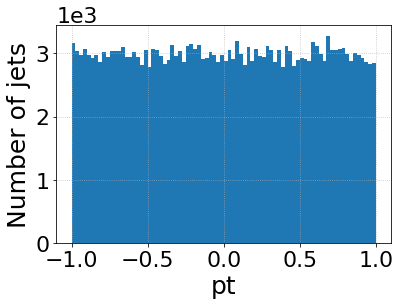

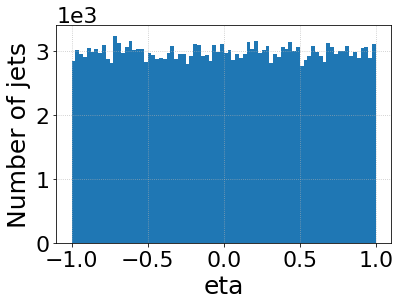

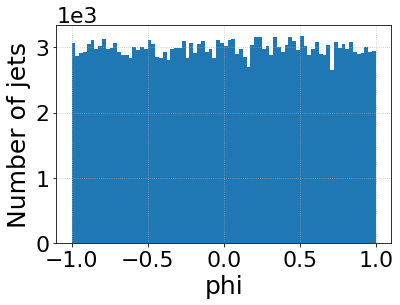

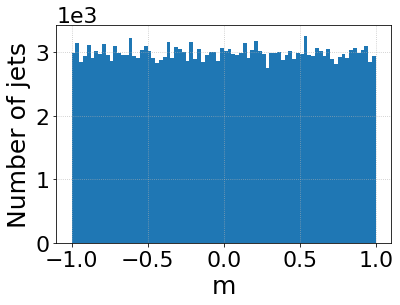

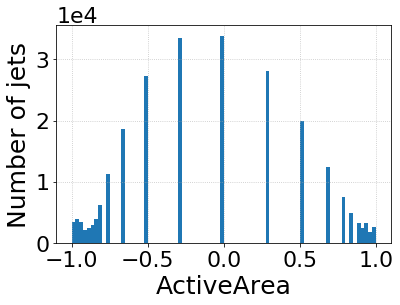

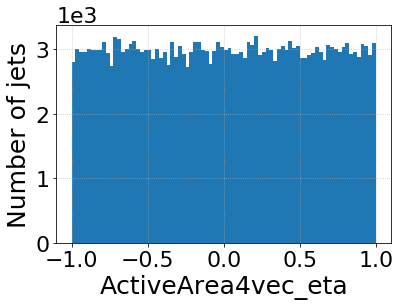

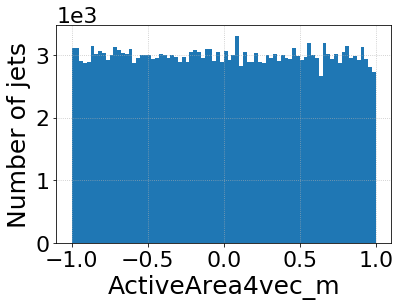

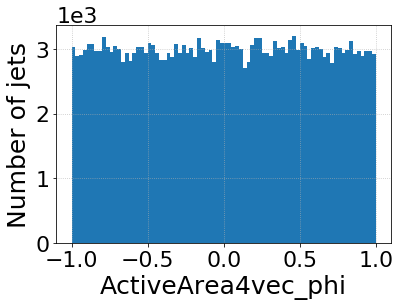

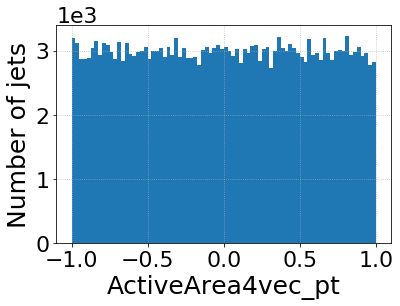

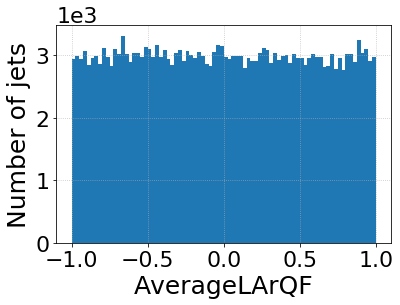

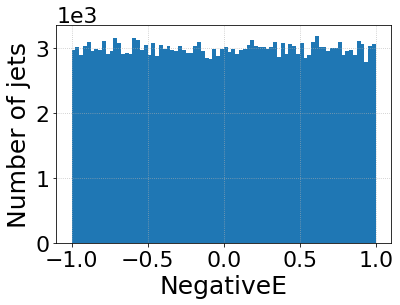

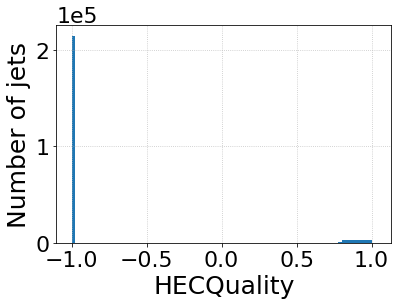

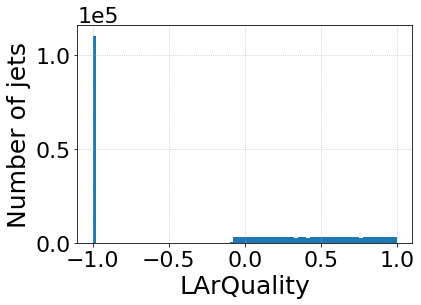

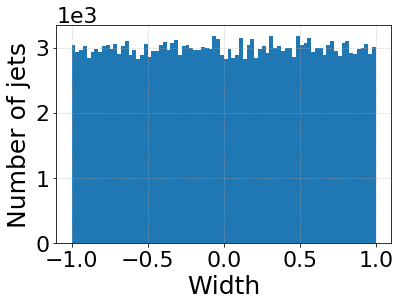

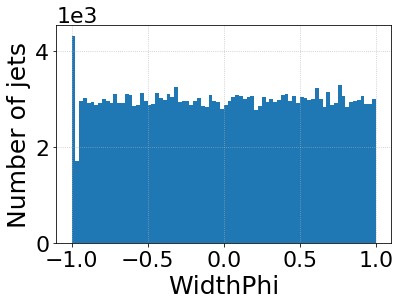

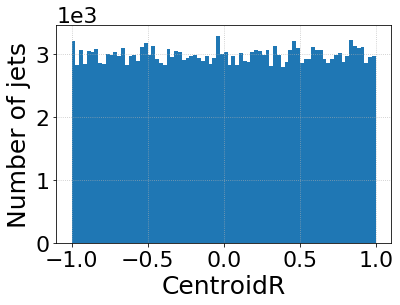

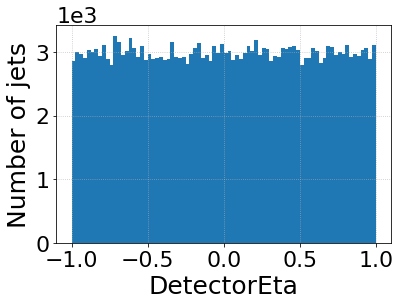

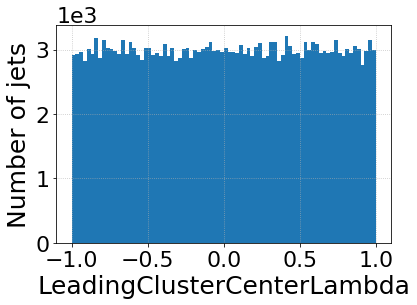

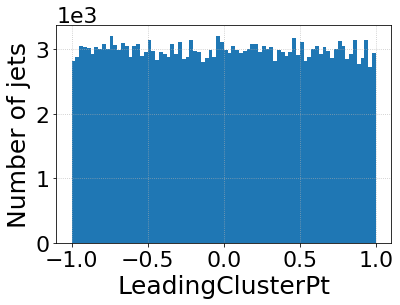

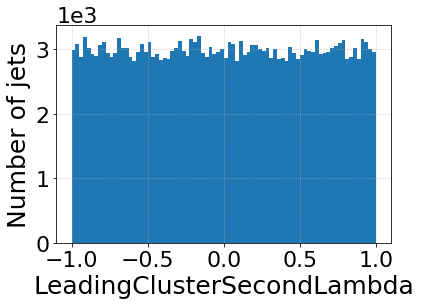

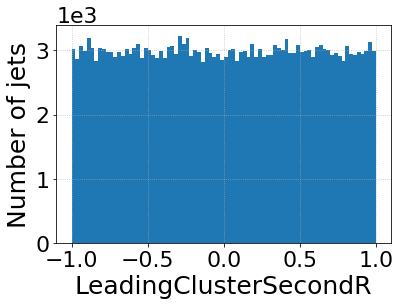

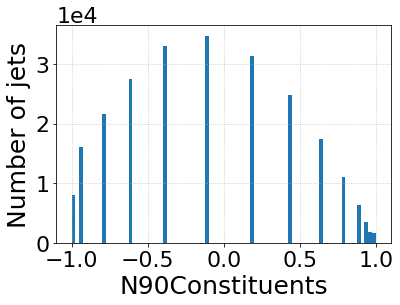

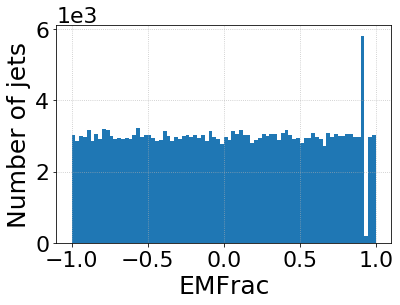

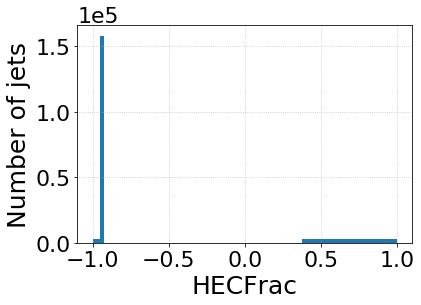

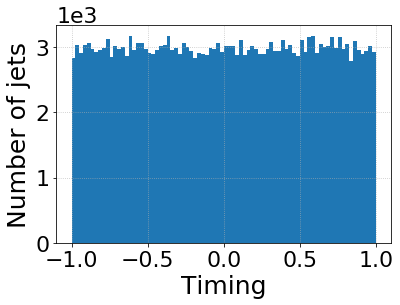

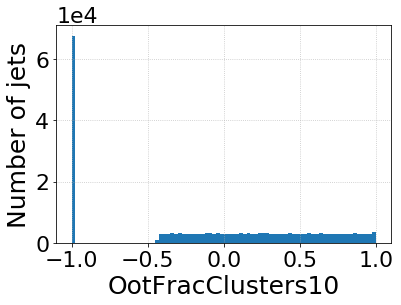

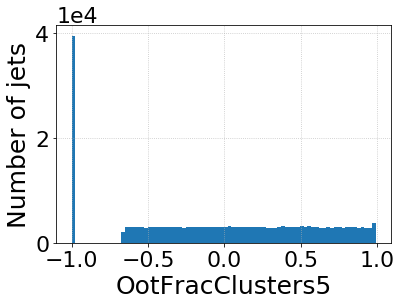

In [11]:
plot_all(scaled_test_df)

/Users/ericwulff/miniconda3/envs/fastairoot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


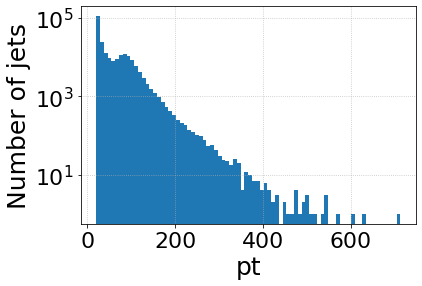

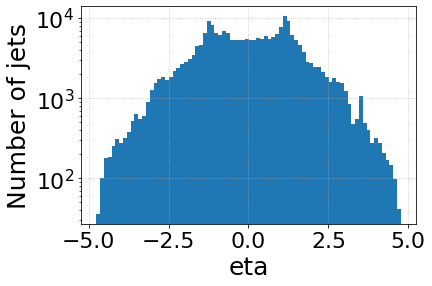

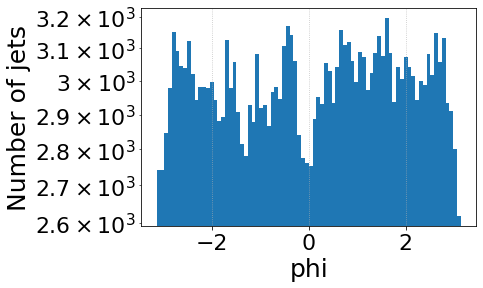

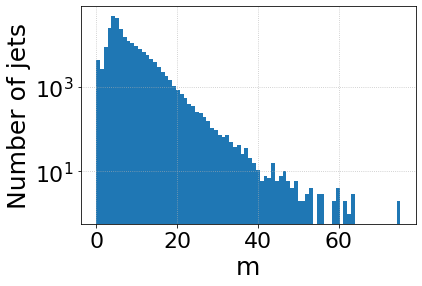

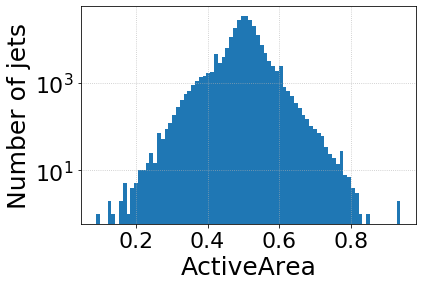

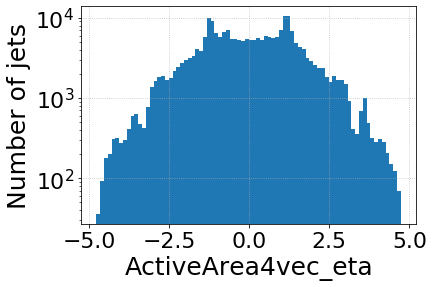

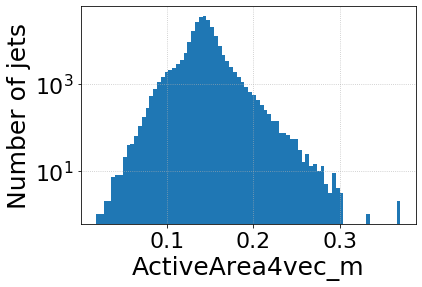

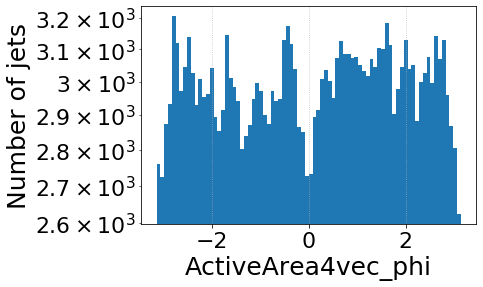

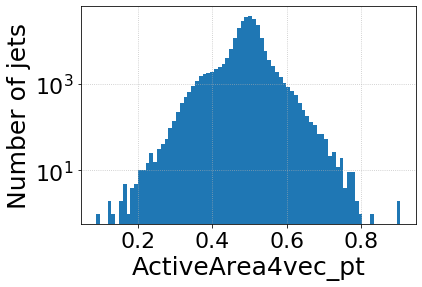

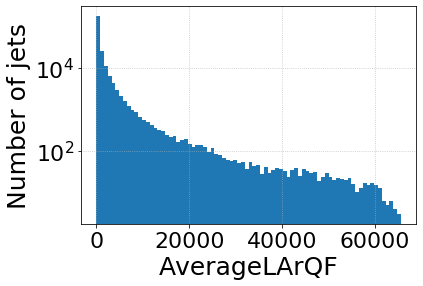

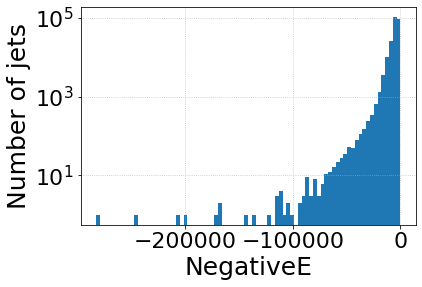

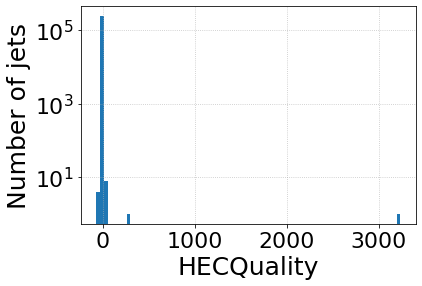

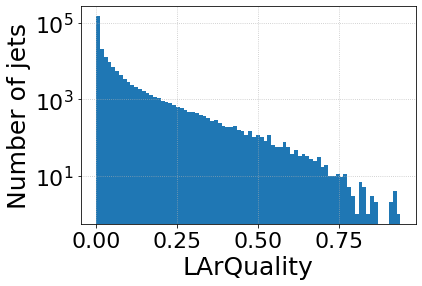

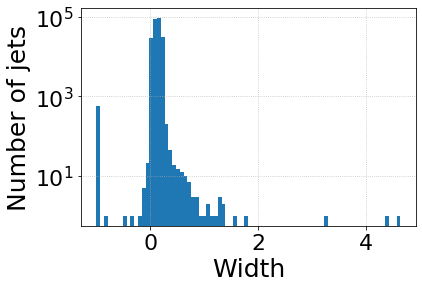

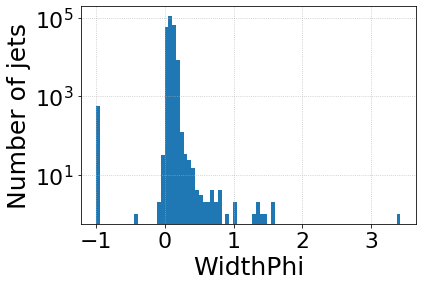

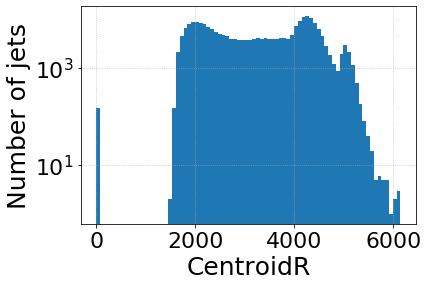

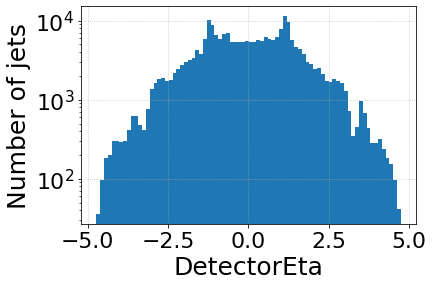

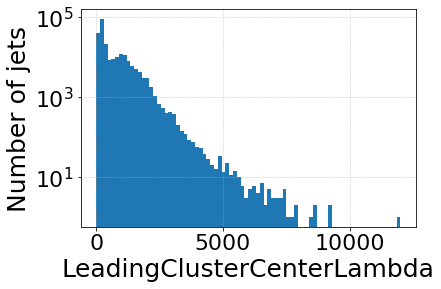

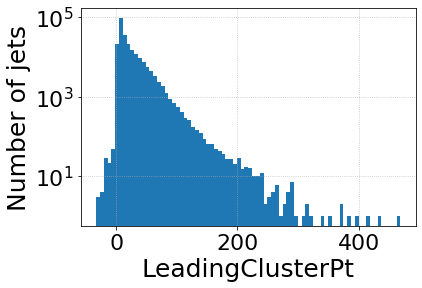

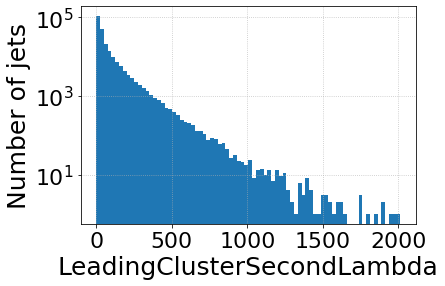

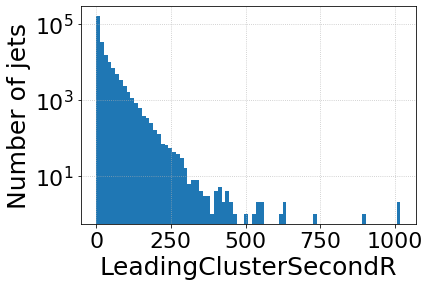

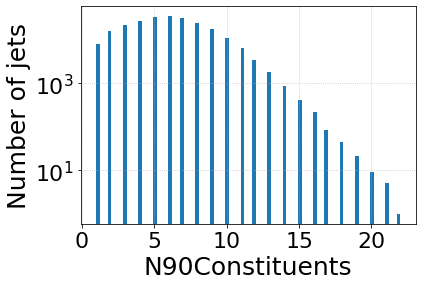

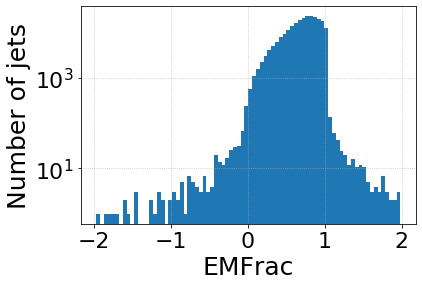

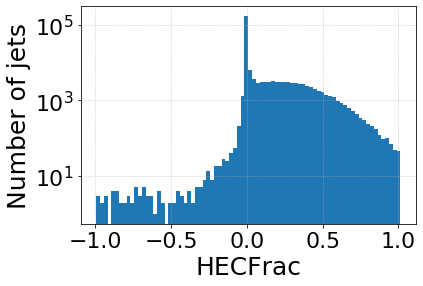

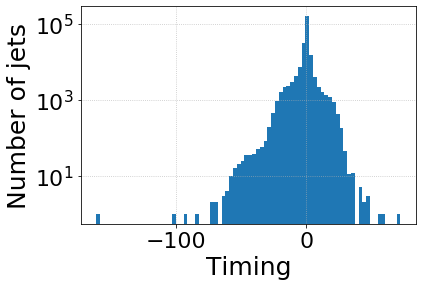

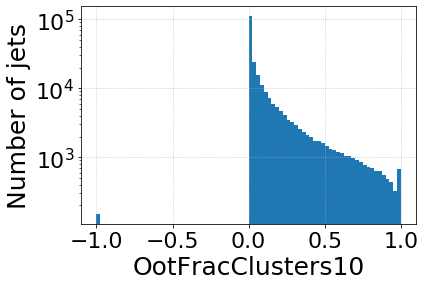

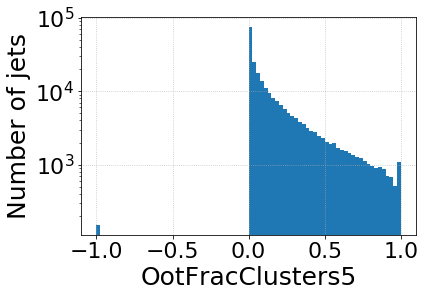

In [13]:
plot_all(test, logy=True)